## Advance Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

### Goals of the Case Study

- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [217]:
# importing warning package to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [218]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

### Importing and Understanding Data

In [219]:
# Reading and inspecting the dataframe

h_data = pd.read_csv(r"train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [220]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [221]:
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [222]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [223]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [224]:
# Checking if there are columns with one unique value 
h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [225]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [226]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [227]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [228]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### Data Preparation (Encoding Categorical Variables, Handling Null Values)


### Imputing Null Values

In [229]:
## Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [230]:
## Treating the NaN Values
h_data['PoolQC'] = h_data['PoolQC'].fillna('NoPool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('NoAlleyAccess')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [231]:
## Dropping the LotFontgage columns as it have more Null values
h_data.drop("LotFrontage",axis = 1, inplace=True)

In [232]:
# Imputing the Nan Values with 'No Basementh_data'
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    h_data[col] = h_data[col].fillna('No_Basement')

In [233]:
#Imputing the NaN values with 'no garage' 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    h_data[col] = h_data[col].fillna('No_Garage')


In [234]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [235]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)

## Performing EDA


### Univariate and Bivariate Analysis

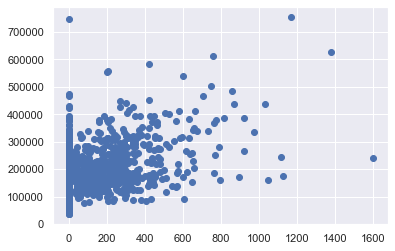

In [236]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer_Area')

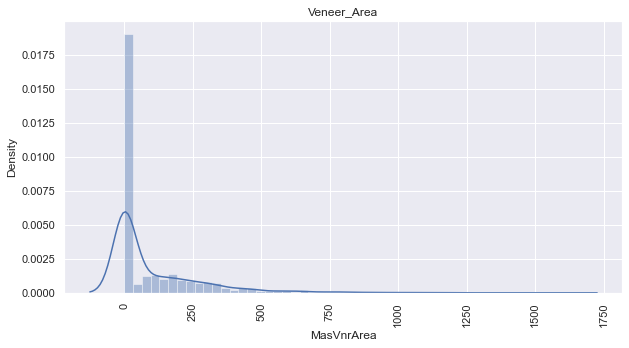

In [237]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.set_color_codes()
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90,color='z')
plt.title('Veneer_Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

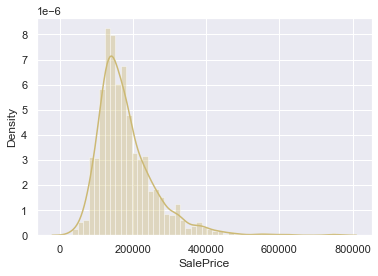

In [238]:
sns.distplot(h_data['SalePrice'],color='y')

In [239]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

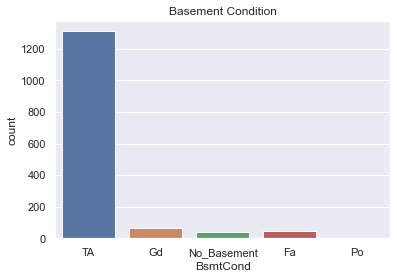

In [240]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

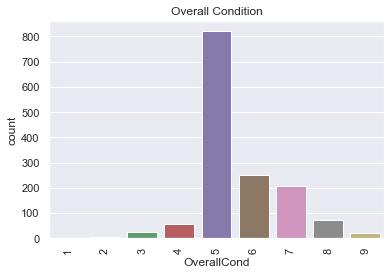

In [241]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

               5 is most overall condition

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

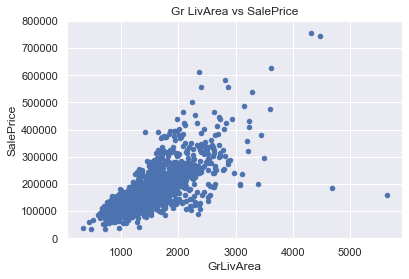

In [242]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

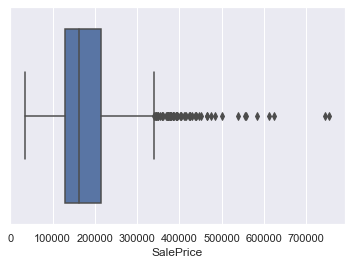

In [243]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

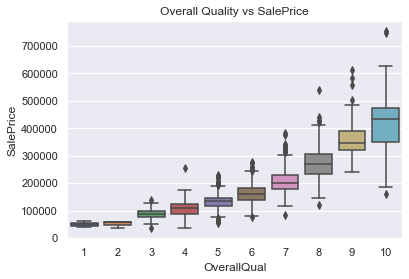

In [244]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

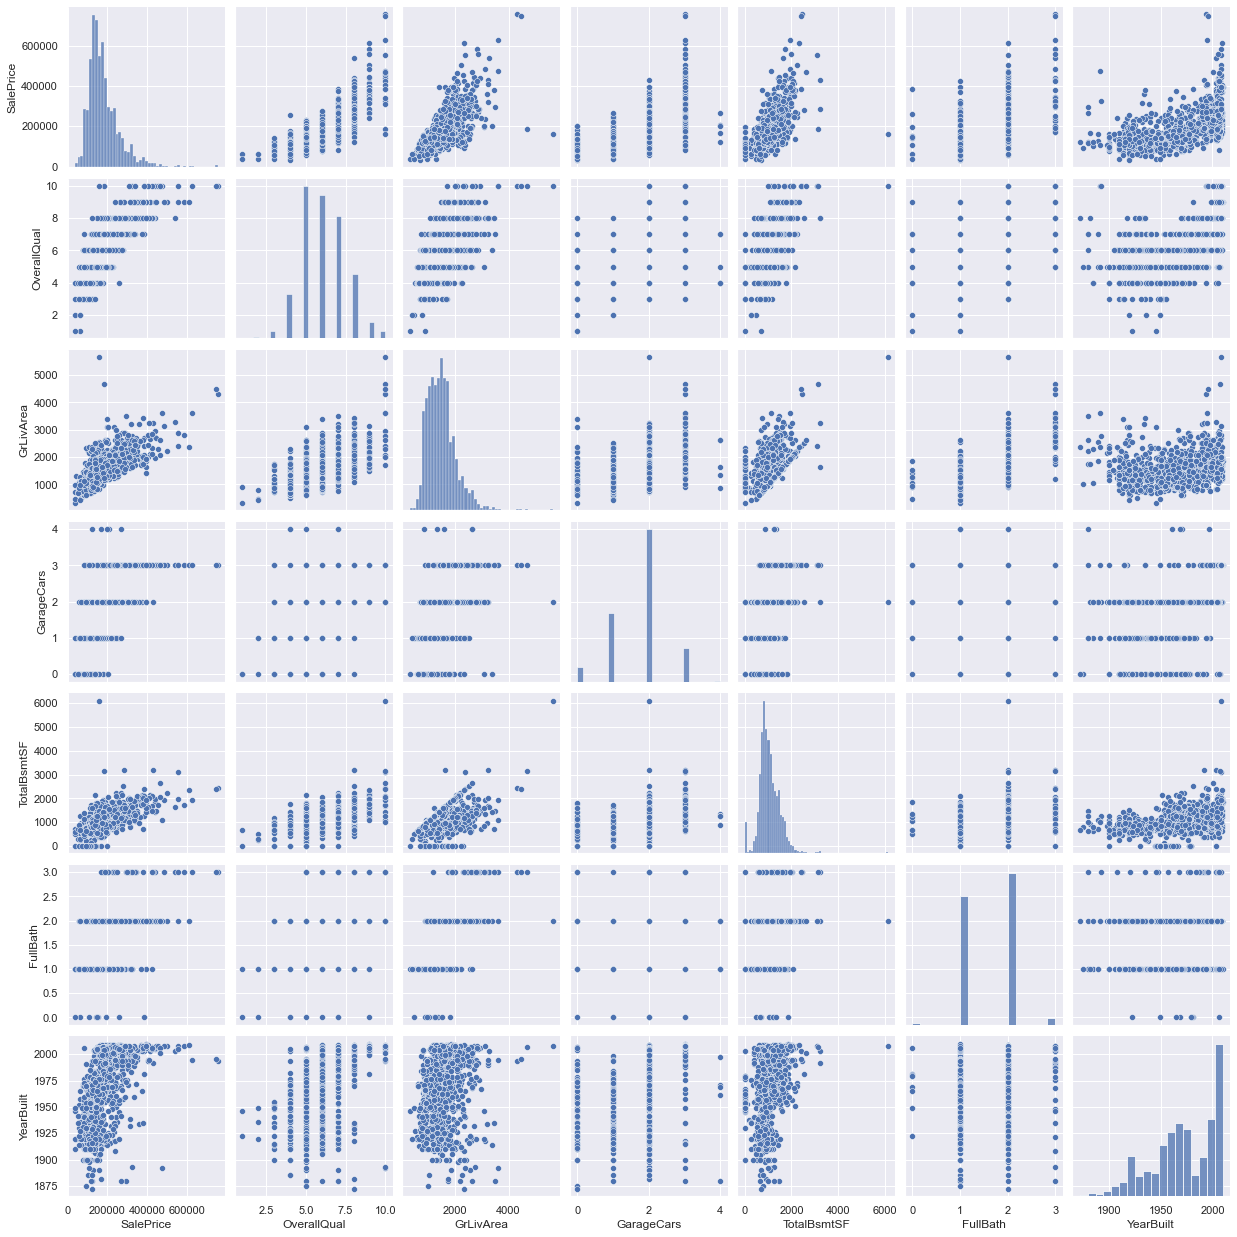

In [245]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

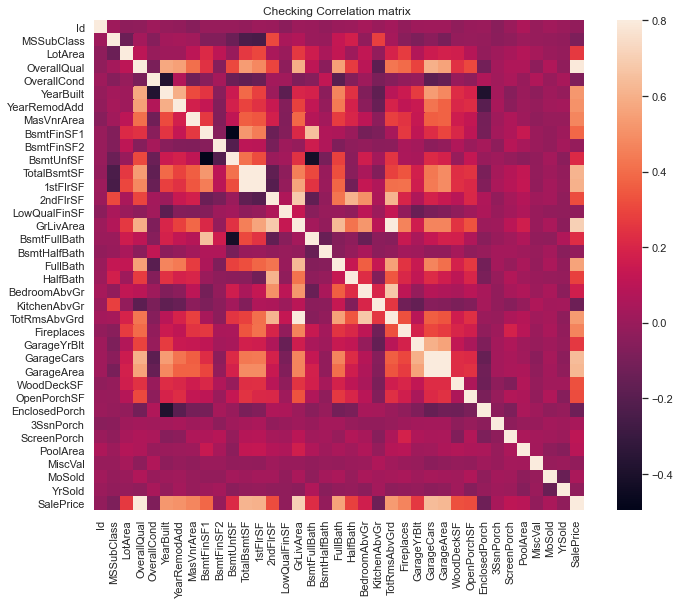

In [246]:
#checjing the correlation matrix
corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

## Data Preperation 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

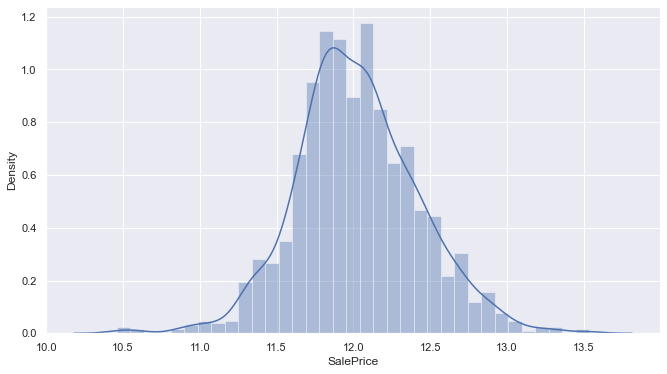

In [247]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

#### ```Deriving Variables```

In [248]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [249]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [250]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,NoPool,No_Fence,None,WD,Normal
1,RL,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,NoPool,No_Fence,None,WD,Normal
2,RL,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,NoPool,No_Fence,None,WD,Normal
3,RL,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,NoPool,No_Fence,None,WD,Abnorml
4,RL,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,NoPool,No_Fence,None,WD,Normal


In [251]:
# convert into dummies
data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [252]:
## Droping the 'Id' column 
df = h_data.drop(['Id'],axis=1)

In [253]:
# Droping the original categorical column
df = df.drop(list(cat_values.columns), axis=1)

In [254]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,data_dummies], axis=1)

In [255]:
df.shape

(1460, 259)

# ```Train Test Split```

In [256]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [257]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [258]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [259]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## ```Model Building```

In [260]:
## Building a Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [261]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [262]:
col=X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'ExterCond_Fa', 'Heating_GasA', 'Heating_GasW', 'Heating_Wall',
       'Electrical_FuseP', 'Functional_Sev', 'GarageQual_Po', 'PoolQC_Gd',
       'SaleType_Con'],
      dtype='object')

In [263]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.50e-277
Time:                        23:29:56   Log-Likelihood:                 187.50
No. Observations:                1021   AIC:                            -333.0
Df Residuals:                    1000   BIC:                            -229.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.0537      0.118     93.842      0.000      10.823      11.285
OverallQual             0.3010      0.007     44.085      0.000       0.288       0.314
MSZoning_FV             0.4376      0.085      5.163      0.000       0.271       0.604
MSZoning_RH             0.3965      0.096      4.121      0.000       0.208       0.585
MSZoning_RL             0.5103      0.079      6.494      0.000       0.356       0.664
MSZoning_RM             0.2756      0.079      3.470      0.001       0.120       0.432
Condition2_PosN        -0.7850      0.204     -3.840      0.000      -1.186      -0.384
RoofStyle_Shed          0.2604      0.144      1.808      0.071      -0.022       0.543
RoofMatl_Tar&Grv        0.2418      0.097      2.502      0.012       0.052       0.431
RoofMatl_WdShngl        0.2617      0.102      2.556      0.011       0.061       0.463
Exterior1st_AsphShn    -0.3231      0.204     -1.586      0.113      -0.723       0.077
Exterior1st_BrkComm    -0.5682      0.157     -3.626      0.000      -0.876      -0.261
ExterCond_Fa           -0.1447      0.051     -2.857      0.004      -0.244      -0.045
Heating_GasA            0.5067      0.088      5.752      0.000       0.334       0.680
Heating_GasW            0.6209      0.105      5.908      0.000       0.415       0.827
Heating_Wall            0.4232      0.135      3.141      0.002       0.159       0.688
Electrical_FuseP       -0.2822      0.131     -2.160      0.031      -0.539      -0.026
Functional_Sev         -0.5254      0.225     -2.334      0.020      -0.967      -0.084
GarageQual_Po           0.2931      0.168      1.748      0.081      -0.036       0.622
PoolQC_Gd              -0.9289      0.204     -4.543      0.000      -1.330      -0.528
SaleType_Con            0.1464      0.145      1.011      0.312      -0.138       0.430
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.710
Skew:                           0.108   Prob(JB):                      0.00287
Kurtosis:                       3.478   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [265]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [266]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-0.08888098944882783


In [267]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018350,0.004948,0.011140,0.004363,0.0001,{'alpha': 0.0001},-0.091274,-0.095970,-0.095115,-0.087270,...,-0.090442,0.004999,14,-0.054605,-0.055116,-0.055868,-0.056766,-0.055703,-0.055612,0.000730
1,0.022473,0.004685,0.010515,0.006721,0.001,{'alpha': 0.001},-0.090983,-0.095920,-0.095063,-0.087130,...,-0.090319,0.005012,13,-0.054636,-0.055125,-0.055882,-0.056849,-0.055737,-0.055646,0.000748
2,0.021487,0.003988,0.008534,0.004982,0.01,{'alpha': 0.01},-0.090336,-0.095578,-0.094677,-0.086390,...,-0.089882,0.004969,8,-0.054827,-0.055242,-0.056021,-0.057084,-0.055876,-0.055810,0.000770
3,0.016370,0.009036,0.013899,0.005978,0.05,{'alpha': 0.05},-0.089986,-0.094656,-0.094106,-0.084322,...,-0.089209,0.004837,4,-0.055804,-0.055717,-0.056608,-0.057731,-0.056751,-0.056522,0.000733
4,0.016009,0.002070,0.011869,0.005277,0.1,{'alpha': 0.1},-0.089849,-0.094134,-0.094175,-0.082815,...,-0.088881,0.004961,1,-0.057018,-0.056194,-0.057298,-0.058636,-0.057873,-0.057404,0.000820
5,0.015529,0.004873,0.007840,0.006453,0.2,{'alpha': 0.2},-0.090371,-0.093811,-0.094777,-0.081243,...,-0.088886,0.005316,2,-0.059147,-0.056934,-0.058598,-0.060613,-0.059764,-0.059011,0.001236
6,0.017843,0.000994,0.010333,0.008131,0.3,{'alpha': 0.3},-0.090967,-0.093766,-0.095287,-0.080172,...,-0.089004,0.005682,3,-0.060826,-0.057553,-0.059779,-0.062291,-0.061428,-0.060376,0.001631
7,0.019384,0.002680,0.007060,0.006474,0.4,{'alpha': 0.4},-0.091500,-0.093849,-0.095743,-0.079512,...,-0.089267,0.005926,5,-0.062214,-0.058068,-0.060730,-0.063693,-0.062831,-0.061507,0.001973
8,0.011835,0.010647,0.008245,0.007529,0.5,{'alpha': 0.5},-0.091857,-0.093888,-0.096105,-0.079479,...,-0.089534,0.005980,6,-0.063437,-0.058535,-0.061536,-0.064837,-0.063983,-0.062466,0.002244
9,0.018258,0.005302,0.007040,0.005357,0.6,{'alpha': 0.6},-0.092051,-0.093944,-0.096400,-0.079521,...,-0.089741,0.006008,7,-0.064470,-0.058963,-0.062212,-0.065800,-0.064951,-0.063279,0.002463


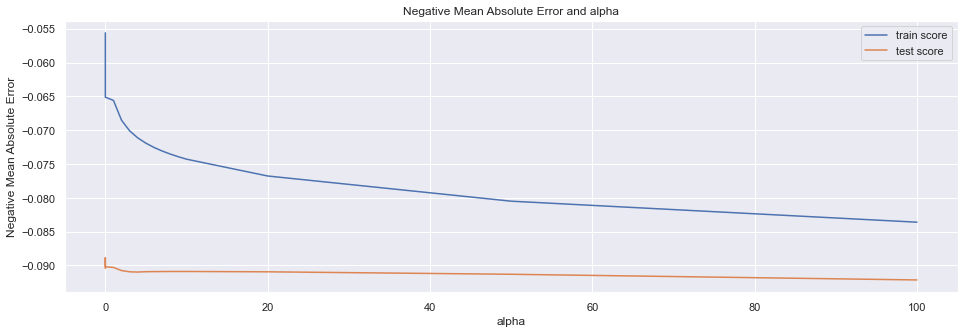

In [268]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [269]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.13588683e-02,  1.89916299e-02,  7.32788104e-03,  7.96272008e-02,
        4.07795269e-02,  3.72507374e-02,  2.05612877e-02, -2.78758819e-03,
       -1.30338491e-03,  7.00573179e-03,  4.35785540e-03,  5.54550229e-03,
        1.48199078e-02,  3.71802799e-02,  4.20642007e-02,  8.38654798e-04,
        6.23082078e-02,  2.96128365e-02,  2.70973194e-03,  1.87339625e-02,
        1.07448695e-02,  1.20910988e-02, -1.36071727e-02,  1.55763919e-02,
        2.26747431e-03, -1.68263637e-07,  4.02874958e-02,  4.26597599e-03,
        1.44157825e-03,  1.36107502e-02, -2.04563445e-03,  8.78571434e-03,
        7.21095211e-03,  1.06190229e-02, -1.48411310e-02, -1.44232684e-06,
       -1.10809910e-03, -6.42496907e-03,  4.82665535e-02,  3.90986114e-02,
        6.20215882e-02,  1.56874684e-02,  2.13182526e-03,  2.59755306e-02,
        2.43135413e-02, -5.00428493e-02,  4.82153805e-03,  3.82124377e-02,
        3.57786634e-02,  4.68949873e-02, -1.30779083e-02,  3.69460173e-02,
       -3.54873205e-02, -

In [270]:
#lets predict the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9220052574594756


In [271]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8855287818493235


In [272]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

0.018835107573615575

### Lasso Regression

In [273]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [274]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [275]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.0833575790520841


In [276]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [277]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174442574972889


In [278]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.855123192817482


In [279]:
mean_squared_error(y_test, y_test_pred)

0.023838046736017564

In [280]:
lasso.coef_

array([-1.58986880e-02,  1.77328839e-02,  7.45493006e-03,  8.92609173e-02,
        4.49733107e-02,  5.24420084e-02,  2.11904683e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73403190e-02,
        1.31726648e-02,  5.57365739e-04,  0.00000000e+00, -2.81043595e-03,
        1.18031173e-01,  3.11416982e-02,  2.03120136e-03,  1.33933861e-02,
        8.44317064e-03,  5.66696196e-03, -1.15603901e-02,  1.31358396e-02,
        6.75562031e-03, -1.47256115e-06,  3.89265887e-02,  5.91793364e-03,
        1.83237079e-03,  1.28752008e-02, -0.00000000e+00,  6.00119886e-03,
        5.33435901e-03,  1.05851336e-02, -1.35222907e-02, -9.35029429e-04,
       -1.36117711e-03, -5.93902219e-03,  0.00000000e+00,  0.00000000e+00,
        4.66696364e-02, -7.07128010e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.49559431e-03, -0.00000000e+00,  2.89713629e-02,
       -0.00000000e+00, -

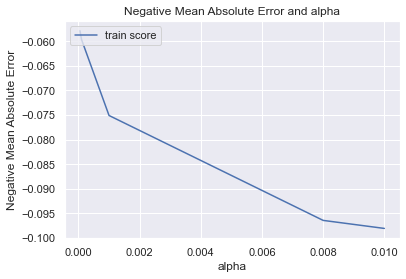

In [281]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [282]:
model_cv.best_params_

{'alpha': 0.1}

In [283]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9575101480652918
0.7491779353883943


In [284]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [285]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.861106
114,RoofMatl_Membran,0.434654
39,MSZoning_FV,0.401680
41,MSZoning_RL,0.401634
40,MSZoning_RH,0.396982
42,MSZoning_RM,0.354847
116,RoofMatl_Roll,0.307542
115,RoofMatl_Metal,0.303696
119,RoofMatl_WdShngl,0.294295
237,PoolQC_NoPool,0.248244


In [286]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174442574972889
0.855123192817482


#### Which variables are significant in predicting the price of a house? Ans>

- MSSubClass
- RoofMatl_Membran
- MSZoning_RL
- MSZoning_FV
- MSZoning_RH
- MSZoning_RM
- Condition2_PosA
- RoofMatl_WdShngl